In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('All Datasets - Final Mediation.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   150 non-null    int64 
 1   text    150 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [3]:
# text = data['text']
# label = data['label']

In [3]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

In [4]:
train_text = data['text'].sample(frac=1)
list_train = list(train_text.index)
train_label = data.iloc[list_train]['label']

In [5]:
test_text= data['text'].sample(frac=1)
list_test = list(test_text.index)
test_label = data.iloc[list_test]['label']

In [6]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for row in train_text:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_text:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [7]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [8]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=512, activation='relu', name='dense_new'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [21]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss=keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           640000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_new (Dense)           (None, 512)               66048     
                                                                 
 dense (Dense)               (None, 24)                12312     
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                        

In [12]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [25]:
num_epochs = 60
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))


Epoch 1/60
5/5 [==============================] - 0s 24ms/step - loss: 1.3285 - accuracy: 0.6133 - val_loss: 1.3121 - val_accuracy: 0.6667
Epoch 2/60
5/5 [==============================] - 0s 21ms/step - loss: 1.3157 - accuracy: 0.6200 - val_loss: 1.3082 - val_accuracy: 0.6667
Epoch 3/60
5/5 [==============================] - 0s 21ms/step - loss: 1.3394 - accuracy: 0.6000 - val_loss: 1.3043 - val_accuracy: 0.6667
Epoch 4/60
5/5 [==============================] - 0s 19ms/step - loss: 1.3175 - accuracy: 0.6133 - val_loss: 1.3005 - val_accuracy: 0.6667
Epoch 5/60
5/5 [==============================] - 0s 20ms/step - loss: 1.3231 - accuracy: 0.6067 - val_loss: 1.2967 - val_accuracy: 0.6667
Epoch 6/60
5/5 [==============================] - 0s 14ms/step - loss: 1.3286 - accuracy: 0.6000 - val_loss: 1.2929 - val_accuracy: 0.6667
Epoch 7/60
5/5 [==============================] - 0s 11ms/step - loss: 1.3618 - accuracy: 0.5733 - val_loss: 1.2892 - val_accuracy: 0.6667
Epoch 8/60
5/5 [===========

5/5 [==============================] - 0s 12ms/step - loss: 1.1593 - accuracy: 0.6067 - val_loss: 1.1225 - val_accuracy: 0.6667
Epoch 60/60
5/5 [==============================] - 0s 11ms/step - loss: 1.1469 - accuracy: 0.6133 - val_loss: 1.1197 - val_accuracy: 0.6667


In [26]:
# average accuracy of model
accuracy = history.history['accuracy']
average_acc = sum(accuracy) / len(accuracy)
print(average_acc)

0.6030000060796737


<Figure size 432x288 with 0 Axes>

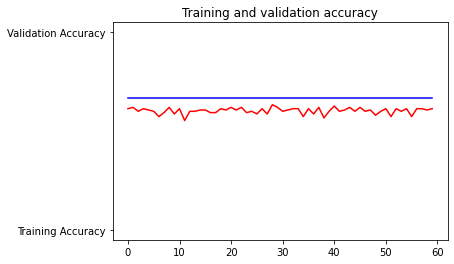

<Figure size 432x288 with 0 Axes>

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

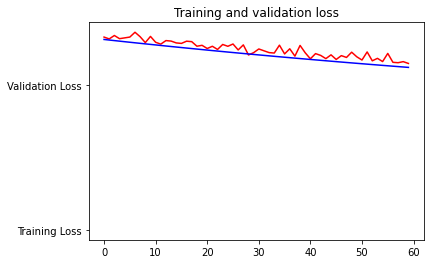

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [87]:
seq_predictions = model.predict(testing_padded)   
seq_predictions = np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get values of predictions 
seq_predictions = list(map(lambda x: 1 if x<=0.017775 else (2 if x < 0.05 else 3), seq_predictions))

(150,)


In [86]:
results = pd.DataFrame(list(testing_labels_final), columns = ['Testing_label'])
results['Predicted'] = list(seq_predictions)
results.sample(10)

,Testing_label,Predicted
43,2,3
20,3,3
103,1,1
11,3,3
101,2,3
132,3,3
31,3,3
148,3,3
36,3,3
84,1,1


In [84]:
# get percentage of correct predicted category
count = 0
for i in range(150):
    if results['Testing_label'].iloc[i] == results['Predicted'].iloc[i]:
        count += 1
print(count/150 * 100)

66.0
